In [1]:
from pathlib import Path

from src import checkpoint, model
from src.device import device
from src.utils import UtilSRCNN

In [2]:
model_name = "srcnn-gaussian-0.55"

mse: 0.0264, psnr: 15.7885


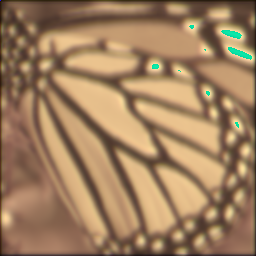

In [3]:
ckp = checkpoint.load(f"{model_name}/0.pt", device)
srcnn = model.SRCNN().to(device)
srcnn.load_state_dict(ckp["model"])

data_dir = Path("data/test/Set5")
a = data_dir / "bird.png"
a = data_dir / "baby.png"
a = data_dir / "butterfly.png"
# a = data_dir / "woman.png"

# data_dir = Path("data/T91/cropped")
# a = data_dir / "t1/t1_0_14.png"

lr, hr, pred_hr = UtilSRCNN.inference(srcnn=srcnn, img_path=a)
UtilSRCNN.detransforms(pred_hr)


mse: 0.0154, psnr: 18.1283


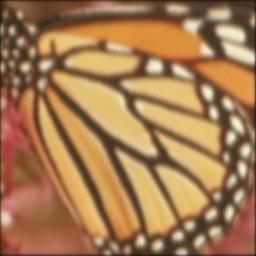

In [4]:
ckp = checkpoint.load(f"{model_name}/best.pt", device)
srcnn = model.SRCNN().to(device)
srcnn.load_state_dict(ckp["model"])

lr, hr, pred_hr = UtilSRCNN.inference(srcnn=srcnn, img_path=a)
UtilSRCNN.detransforms(pred_hr)


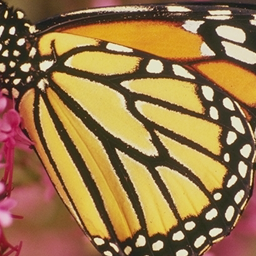

In [5]:
hr

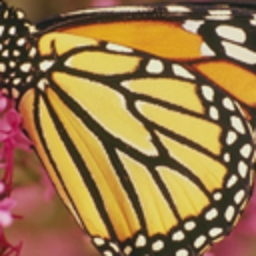

In [6]:
lr